In [1]:
%run "la_00.ipynb"

## **<font color=purple>Data analysis</font>**
### **<font color=blue>General analysis</font>**

In [2]:
by_nt_upd['replicates_mean_brightness'] = by_nt_upd['replicates_mean_brightness'].apply(np.log10)
by_nt_upd

,Unnamed: 0,nt_genotype,gene,aa_genotype_pseudo,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,index_of_dispersion,coefficient_of_variation,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_genotype_native
0,0,A100C,amacGFP,E36A,165.00,13.0,1059.270957,3.995216,113.448226,0.107100,NaN,NaN,NaN,NaN,E33A
1,1,A100C:A144T:C172A,amacGFP,E36A:T51S:P60H,30.97,2.0,106.887117,2.388272,46.728167,0.437173,NaN,NaN,NaN,NaN,E33A:T48S:P57H
2,2,A100C:A304C:A436C:T452C:T532C:C566T,amacGFP,E36A:D105A:N149T:L181P,53.61,5.0,289.737621,3.394929,33.812810,0.116701,NaN,NaN,NaN,NaN,E33A:D101A:N145T:L177P
3,3,A100C:A349T,amacGFP,E36A:D120V,39.33,2.0,339.869768,3.977187,12.174127,0.035820,NaN,NaN,NaN,NaN,E33A:D116V
4,4,A100C:A489T:T667C:G681T,amacGFP,E36A:N167Y:F230S:G235W,72.07,6.0,772.824837,3.805555,93.455985,0.120928,NaN,NaN,NaN,NaN,E33A:N163Y:F222S:G227W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126561,125673,T661C:C662G:G663C:C664A:A665T:T666G:G667A:A668T,ppluGFP,F240S:A241H:*246D,112.07,6.0,875.145638,4.405320,30.119034,0.034416,NaN,NaN,NaN,NaN,F220S:A221H:*222D
126562,125679,T666A:G667T:A668G,ppluGFP,*246M,132.15,8.0,1199.467386,4.203663,90.014798,0.075046,NaN,NaN,NaN,NaN,*222M
126563,125682,T666C,ppluGFP,*246R,756.39,31.0,2435.088387,4.250819,332.820445,0.136677,NaN,NaN,NaN,NaN,*222R
126564,125686,T666G,ppluGFP,*246G,491.92,34.0,2395.264114,4.238693,331.141806,0.138249,NaN,NaN,NaN,NaN,*222G


In [3]:
by_nt=by_nt_upd

In [4]:
#Take the gene names of the dataset

genes = sorted(set(by_nt.gene))

genes

['amacGFP', 'cgreGFP', 'ppluGFP']

In [5]:
#Calculate the brightness of the wildtype genes

wt_brightness = {}
for gene in genes:
    wt = by_nt[(by_nt['gene']== gene) & (by_nt['nt_genotype']=='wt')]
    wt_brightness[gene] = wt['replicates_mean_brightness'].median()
    
wt_brightness

{'amacGFP': 3.9759417642196695,
 'cgreGFP': 4.494366479589088,
 'ppluGFP': 4.2269429241006415}

In [6]:
#Create a new dataset which will be sorted by the amino acid genotype

by_aa = by_nt.groupby(['gene', 'aa_genotype_pseudo']).agg({'nt_genotype': 'all', 
                         'total_cell_count': np.sum, 
                         'n_replicates': np.sum, 
                         'replicates_stdev_weighted': np.median,
                        'ddG_monomer': np.median, 'ddG_monomer_stdev': np.median,
                        'ddG_dimer': np.median, 'ddG_dimer_stdev': np.median})
by_aa.reset_index(inplace=True)

by_aa

,gene,aa_genotype_pseudo,nt_genotype,total_cell_count,n_replicates,replicates_stdev_weighted,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev
0,amacGFP,*246G,True,1986.35,177.0,1311.035247,NaN,NaN,NaN,NaN
1,amacGFP,*246L,True,32.68,4.0,1122.752059,NaN,NaN,NaN,NaN
2,amacGFP,*246R,True,312.67,34.0,1288.821522,NaN,NaN,NaN,NaN
3,amacGFP,*246W,True,331.73,24.0,1123.610528,NaN,NaN,NaN,NaN
4,amacGFP,A160D,True,684.24,40.0,998.796167,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
92383,ppluGFP,Y95S:N222Y,True,96.47,7.0,1547.845384,NaN,NaN,NaN,NaN
92384,ppluGFP,Y95S:R99C:F113S,True,65.83,3.0,278.175491,NaN,NaN,NaN,NaN
92385,ppluGFP,Y95S:S192G,True,55.05,6.0,1694.179067,NaN,NaN,NaN,NaN
92386,ppluGFP,Y95S:Y103C,True,88.40,14.0,2343.740353,NaN,NaN,NaN,NaN


### **<font color=blue>Mutation analysis</font>**

In [7]:
#Calculate the number of single nucleotide mutations and the amino acid mutations and include this values into by_nt

sum_mut = lambda s: (len(s)>0)*(len(s.split(':'))) if s!='wt' else 0
by_nt['nt_mutnumber'] = by_nt['nt_genotype'].apply(sum_mut)
by_nt['aa_mutnumber'] = by_nt['aa_genotype_pseudo'].apply(sum_mut)

#Calculate the number of synonymous mutations and the nonsynonymous mutations and include this values into by_nt

by_nt['syn_mutnumber'] = by_nt['nt_mutnumber'] - by_nt['aa_mutnumber']
by_nt['nonsyn_mutnumber'] = by_nt['aa_mutnumber']

by_nt

,Unnamed: 0,nt_genotype,gene,aa_genotype_pseudo,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,index_of_dispersion,coefficient_of_variation,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_genotype_native,nt_mutnumber,aa_mutnumber,syn_mutnumber,nonsyn_mutnumber
0,0,A100C,amacGFP,E36A,165.00,13.0,1059.270957,3.995216,113.448226,0.107100,NaN,NaN,NaN,NaN,E33A,1,1,0,1
1,1,A100C:A144T:C172A,amacGFP,E36A:T51S:P60H,30.97,2.0,106.887117,2.388272,46.728167,0.437173,NaN,NaN,NaN,NaN,E33A:T48S:P57H,3,3,0,3
2,2,A100C:A304C:A436C:T452C:T532C:C566T,amacGFP,E36A:D105A:N149T:L181P,53.61,5.0,289.737621,3.394929,33.812810,0.116701,NaN,NaN,NaN,NaN,E33A:D101A:N145T:L177P,6,4,2,4
3,3,A100C:A349T,amacGFP,E36A:D120V,39.33,2.0,339.869768,3.977187,12.174127,0.035820,NaN,NaN,NaN,NaN,E33A:D116V,2,2,0,2
4,4,A100C:A489T:T667C:G681T,amacGFP,E36A:N167Y:F230S:G235W,72.07,6.0,772.824837,3.805555,93.455985,0.120928,NaN,NaN,NaN,NaN,E33A:N163Y:F222S:G227W,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126561,125673,T661C:C662G:G663C:C664A:A665T:T666G:G667A:A668T,ppluGFP,F240S:A241H:*246D,112.07,6.0,875.145638,4.405320,30.119034,0.034416,NaN,NaN,NaN,NaN,F220S:A221H:*222D,8,3,5,3
126562,125679,T666A:G667T:A668G,ppluGFP,*246M,132.15,8.0,1199.467386,4.203663,90.014798,0.075046,NaN,NaN,NaN,NaN,*222M,3,1,2,1
126563,125682,T666C,ppluGFP,*246R,756.39,31.0,2435.088387,4.250819,332.820445,0.136677,NaN,NaN,NaN,NaN,*222R,1,1,0,1
126564,125686,T666G,ppluGFP,*246G,491.92,34.0,2395.264114,4.238693,331.141806,0.138249,NaN,NaN,NaN,NaN,*222G,1,1,0,1


## **<font color=purple>Synonymous mutations analysis</font>**

In [8]:
#Create a new dataset which will be sorted by gene, amino acid genotype and nucleotide genotype

aa_mut = by_nt.groupby(['gene','aa_genotype_pseudo', 'nt_genotype']).agg({'total_cell_count': np.sum, 
                         'n_replicates': np.sum, 
                         'replicates_stdev_weighted': np.median, 'replicates_mean_brightness': np.mean,
                        'ddG_monomer': np.median, 'ddG_monomer_stdev': np.median,
                        'ddG_dimer': np.median, 'ddG_dimer_stdev': np.median, 'nt_mutnumber': np.mean, 'aa_mutnumber': np.mean,
                                                                 'syn_mutnumber': np.mean,})
aa_mut.reset_index(inplace=True)

aa_mut

,gene,aa_genotype_pseudo,nt_genotype,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,nt_mutnumber,aa_mutnumber,syn_mutnumber
0,amacGFP,*246G,A461C:T714G,53.70,6.0,550.913282,3.966691,NaN,NaN,NaN,NaN,2,1,1
1,amacGFP,*246G,A461T:T714G,173.12,12.0,1128.986810,3.989159,NaN,NaN,NaN,NaN,2,1,1
2,amacGFP,*246G,C131A:T714G,39.57,2.0,604.034225,3.956547,NaN,NaN,NaN,NaN,2,1,1
3,amacGFP,*246G,C347A:T714G,64.67,5.0,1307.046595,3.924950,NaN,NaN,NaN,NaN,2,1,1
4,amacGFP,*246G,C579T:T714G,33.31,4.0,1808.375972,4.059697,NaN,NaN,NaN,NaN,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126561,ppluGFP,wt,T659A,2550.52,100.0,2179.232814,4.229176,NaN,NaN,NaN,NaN,1,0,1
126562,ppluGFP,wt,T659A:C662T,241.75,6.0,1087.798528,4.241842,NaN,NaN,NaN,NaN,2,0,2
126563,ppluGFP,wt,T659C,3953.45,174.0,2149.481279,4.227871,NaN,NaN,NaN,NaN,1,0,1
126564,ppluGFP,wt,T659G,1991.66,49.0,1502.910328,4.225663,NaN,NaN,NaN,NaN,1,0,1


## **<font color=green>amacGFP</font>**

In [9]:
#From the previously created dataset, select the data for the amacGFP gene

aa_mut_amacGFP = aa_mut[aa_mut.gene=='amacGFP']
aa_mut_amacGFP.reset_index(inplace=True)

aa_mut_amacGFP

,index,gene,aa_genotype_pseudo,nt_genotype,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,nt_mutnumber,aa_mutnumber,syn_mutnumber
0,0,amacGFP,*246G,A461C:T714G,53.70,6.0,550.913282,3.966691,NaN,NaN,NaN,NaN,2,1,1
1,1,amacGFP,*246G,A461T:T714G,173.12,12.0,1128.986810,3.989159,NaN,NaN,NaN,NaN,2,1,1
2,2,amacGFP,*246G,C131A:T714G,39.57,2.0,604.034225,3.956547,NaN,NaN,NaN,NaN,2,1,1
3,3,amacGFP,*246G,C347A:T714G,64.67,5.0,1307.046595,3.924950,NaN,NaN,NaN,NaN,2,1,1
4,4,amacGFP,*246G,C579T:T714G,33.31,4.0,1808.375972,4.059697,NaN,NaN,NaN,NaN,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45618,45618,amacGFP,wt,T689C,1612.56,112.0,1339.896231,3.973505,NaN,NaN,NaN,NaN,1,0,1
45619,45619,amacGFP,wt,T689C:C705T,57.37,7.0,2215.759713,3.981512,NaN,NaN,NaN,NaN,2,0,2
45620,45620,amacGFP,wt,T689G,203.89,11.0,1591.104228,4.006488,NaN,NaN,NaN,NaN,1,0,1
45621,45621,amacGFP,wt,T689G:C710T,71.84,2.0,324.374987,4.024163,NaN,NaN,NaN,NaN,2,0,2


In [10]:
#Calculate the number of different aa genotypes that we have in amacGFP and create a value with all of them

aa_mut_types_amac = aa_mut_amacGFP.aa_genotype_pseudo.unique()
print(len(aa_mut_types_amac))

34949


In [11]:
amino_amacGFP = {}
nt_amacGFP = {}
brightness_amacGFP = {}
synmut_amacGFP = {}
                

for index, row in aa_mut_amacGFP.iterrows(): 
        if ':' not in row["aa_genotype_pseudo"]:
            try:
                amino_amacGFP[index] = (row["aa_genotype_pseudo"])
                nt_amacGFP[index] = (row["nt_genotype"])
                brightness_amacGFP[index] = (row["replicates_mean_brightness"])
                synmut_amacGFP[index] = (row["syn_mutnumber"])
                
            except IndexError:
                pass
            except ValueError:
                pass

In [12]:
amino_amacGFP = pd.DataFrame.from_dict(amino_amacGFP, orient='index')
nt_amacGFP = pd.DataFrame.from_dict(nt_amacGFP, orient='index')
brightness_amacGFP = pd.DataFrame.from_dict(brightness_amacGFP, orient='index')
synmut_amacGFP = pd.DataFrame.from_dict(synmut_amacGFP, orient='index')

result_aa_amacGFP = pd.concat([amino_amacGFP, nt_amacGFP, brightness_amacGFP, synmut_amacGFP], axis=1, sort=False)
result_aa_amacGFP.columns =['aa','nt', 'bright', 'synmut']
#result_aa_amacGFP = result_median_cgreGFP.rename_axis('Position').reset_index()

result_aa_amacGFP

,aa,nt,bright,synmut
0,*246G,A461C:T714G,3.966691,1
1,*246G,A461T:T714G,3.989159,1
2,*246G,C131A:T714G,3.956547,1
3,*246G,C347A:T714G,3.924950,1
4,*246G,C579T:T714G,4.059697,1
...,...,...,...,...
45618,wt,T689C,3.973505,1
45619,wt,T689C:C705T,3.981512,2
45620,wt,T689G,4.006488,1
45621,wt,T689G:C710T,4.024163,2


In [13]:
aa_mut_types_amac_unique = result_aa_amacGFP.aa.unique()
print(len(aa_mut_types_amac_unique))

1212


In [14]:
aa_mean_amacGFP = {}
aa_std_amacGFP = {}
for amino in aa_mut_types_amac:
    aa_mean_amac = result_aa_amacGFP[result_aa_amacGFP.aa == amino]
    aa_mean_amacGFP[amino] = aa_mean_amac[aa_mean_amac['synmut']==0]['bright'].mean()

In [15]:
synmut0_amacGFP = result_aa_amacGFP.loc[result_aa_amacGFP['synmut'] == 0]
synmut0_amacGFP

,aa,nt,bright,synmut
7,*246G,T714G,3.972704,0
8,*246L,G715T,3.949572,0
11,*246R,T714A,3.982464,0
12,*246R,T714C,3.972548,0
13,*246W,A716G,3.989683,0
...,...,...,...,...
44340,Y68N,T195A,2.429493,0
44405,Y76F,A220T,3.496135,0
44473,Y95F,A274T,3.608864,0
44531,Y95S,A274C,2.742189,0


In [16]:
aa_mean_amacGFP_new = pd.DataFrame.from_dict(aa_mean_amacGFP, orient='index')
aa_mean_amacGFP_new.columns =['mean']
aa_mean_amacGFP_new = aa_mean_amacGFP_new.rename_axis('aa').reset_index()
aa_mean_amacGFP_new

,aa,mean
0,*246G,3.972704
1,*246L,3.949572
2,*246R,3.977506
3,*246W,3.989683
4,A160D,3.939211
...,...,...
34944,Y95N:T111A,NaN
34945,Y95S,2.742189
34946,Y95S:I203F,NaN
34947,Y95S:K129M:D136G:M156I:T211I,NaN


In [17]:
result_aa_amacGFP_bis = pd.merge(result_aa_amacGFP, aa_mean_amacGFP_new, how='outer', on='aa')
result_aa_amacGFP_bis = result_aa_amacGFP_bis.dropna()

result_aa_amacGFP_bis

,aa,nt,bright,synmut,mean
0,*246G,A461C:T714G,3.966691,1.0,3.972704
1,*246G,A461T:T714G,3.989159,1.0,3.972704
2,*246G,C131A:T714G,3.956547,1.0,3.972704
3,*246G,C347A:T714G,3.924950,1.0,3.972704
4,*246G,C579T:T714G,4.059697,1.0,3.972704
...,...,...,...,...,...
8314,wt,T689C,3.973505,1.0,3.975942
8315,wt,T689C:C705T,3.981512,2.0,3.975942
8316,wt,T689G,4.006488,1.0,3.975942
8317,wt,T689G:C710T,4.024163,2.0,3.975942


In [18]:
example_aa = result_aa_amacGFP_bis[result_aa_amacGFP_bis.aa=='*246G']
example_aa

,aa,nt,bright,synmut,mean
0,*246G,A461C:T714G,3.966691,1.0,3.972704
1,*246G,A461T:T714G,3.989159,1.0,3.972704
2,*246G,C131A:T714G,3.956547,1.0,3.972704
3,*246G,C347A:T714G,3.924950,1.0,3.972704
4,*246G,C579T:T714G,4.059697,1.0,3.972704
5,*246G,G191A:T714G,3.992309,1.0,3.972704
6,*246G,G548A:T714G,4.041948,1.0,3.972704
7,*246G,T714G,3.972704,0.0,3.972704


In [19]:
mean_0_amacGFP = result_aa_amacGFP_bis["mean"]
mean_1_amacGFP = result_aa_amacGFP_bis[result_aa_amacGFP_bis['synmut']==1]['bright']
mean_2_amacGFP = result_aa_amacGFP_bis[result_aa_amacGFP_bis['synmut']==2]['bright']
mean_3_amacGFP = result_aa_amacGFP_bis[result_aa_amacGFP_bis['synmut']==3]['bright']
mean_4_amacGFP = result_aa_amacGFP_bis[result_aa_amacGFP_bis['synmut']==4]['bright']
mean_5_amacGFP = result_aa_amacGFP_bis[result_aa_amacGFP_bis['synmut']==5]['bright']

corrP_1_amacGFP =mean_0_amacGFP.corr(mean_1_amacGFP, method='pearson')
corrP_2_amacGFP =mean_0_amacGFP.corr(mean_2_amacGFP, method='pearson')
corrP_3_amacGFP =mean_0_amacGFP.corr(mean_3_amacGFP, method='pearson')
corrP_4_amacGFP =mean_0_amacGFP.corr(mean_4_amacGFP, method='pearson')
corrP_5_amacGFP =mean_0_amacGFP.corr(mean_5_amacGFP, method='pearson')

corrS_1_amacGFP =mean_0_amacGFP.corr(mean_1_amacGFP, method='spearman')
corrS_2_amacGFP =mean_0_amacGFP.corr(mean_2_amacGFP, method='spearman')
corrS_3_amacGFP =mean_0_amacGFP.corr(mean_3_amacGFP, method='spearman')
corrS_4_amacGFP =mean_0_amacGFP.corr(mean_4_amacGFP, method='spearman')
corrS_5_amacGFP =mean_0_amacGFP.corr(mean_5_amacGFP, method='spearman')

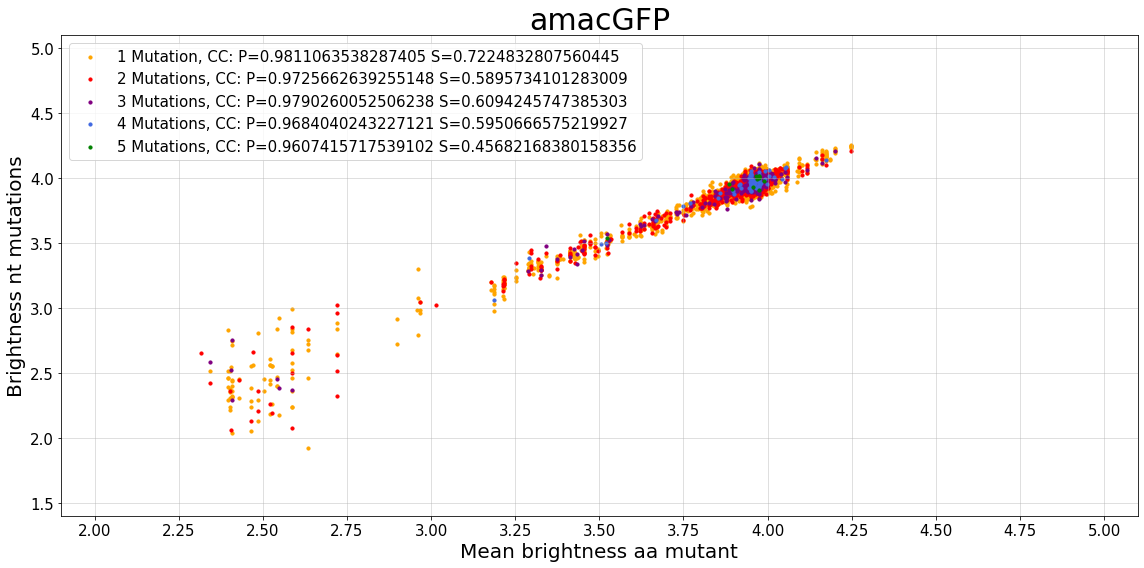

In [48]:
ax = result_aa_amacGFP_bis.loc[result_aa_amacGFP_bis['synmut'] == 1].plot(kind='scatter', x='mean', y='bright', color='orange', label='1 Mutation, CC: P={} S={}'.format(corrP_1_amacGFP,corrS_1_amacGFP), s=10, figsize=(16,8))
result_aa_amacGFP_bis.loc[result_aa_amacGFP_bis['synmut'] == 2].plot(kind='scatter', x='mean', y='bright', color='red', label='2 Mutations, CC: P={} S={}'.format(corrP_2_amacGFP,corrS_2_amacGFP), s=10, ax=ax)  
result_aa_amacGFP_bis.loc[result_aa_amacGFP_bis['synmut'] == 3].plot(kind='scatter', x='mean', y='bright', color='purple', label='3 Mutations, CC: P={} S={}'.format(corrP_3_amacGFP,corrS_3_amacGFP), s=10, ax=ax)  
result_aa_amacGFP_bis.loc[result_aa_amacGFP_bis['synmut'] == 4].plot(kind='scatter', x='mean', y='bright', color='royalblue', label='4 Mutations, CC: P={} S={}'.format(corrP_4_amacGFP,corrS_4_amacGFP), s=10, ax=ax)
result_aa_amacGFP_bis.loc[result_aa_amacGFP_bis['synmut'] == 5].plot(kind='scatter', x='mean', y='bright', color='green', label='5 Mutations, CC: P={} S={}'.format(corrP_5_amacGFP,corrS_5_amacGFP), s=10, ax=ax)  

ax.set_xlabel("Mean brightness aa mutant", fontsize=20)
ax.set_ylabel("Brightness nt mutations", fontsize=20)
ax.set_xticks(np.arange(1.5, 5.5, step=0.25));
ax.set_xlim(xmin=1.9,xmax=5.1)
ax.set_yticks(np.arange(1, 5.5, step=0.5));
ax.set_ylim(ymin=1.4,ymax=5.1)
ax.grid(alpha=0.5)
plt.title('amacGFP', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(loc='upper left',fontsize=15)

plt.tight_layout()
plt.savefig('Syn_mut_amac_mean.png', dpi=300)

## **<font color=green>cgreGFP</font>**

In [23]:
#From the previously created dataset, select the data for the cgreGFP gene

aa_mut_cgreGFP = aa_mut[aa_mut.gene=='cgreGFP']
aa_mut_cgreGFP.reset_index(inplace=True)

aa_mut_cgreGFP

,index,gene,aa_genotype_pseudo,nt_genotype,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,nt_mutnumber,aa_mutnumber,syn_mutnumber
0,45623,cgreGFP,*246C,A707T,87.78,4.0,2807.182537,4.302271,NaN,NaN,NaN,NaN,1,1,0
1,45624,cgreGFP,*246G,T705G,1499.77,22.0,2397.969420,4.466539,NaN,NaN,NaN,NaN,1,1,0
2,45625,cgreGFP,A113D,C331A,274.17,8.0,246.686041,2.299773,6.7,2.16,5.38,0.94,1,1,0
3,45626,cgreGFP,A113D:E229D,C331A:G671T,51.53,8.0,219.674060,2.425549,NaN,NaN,NaN,NaN,2,2,0
4,45627,cgreGFP,A113D:E239D,C331A:A695T,232.24,4.0,143.340597,1.976627,NaN,NaN,NaN,NaN,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33777,79400,cgreGFP,wt,T95C:G593A,134.83,6.0,2827.181724,4.552573,NaN,NaN,NaN,NaN,2,0,2
33778,79401,cgreGFP,wt,T95C:T242C,155.04,4.0,887.188840,4.491330,NaN,NaN,NaN,NaN,2,0,2
33779,79402,cgreGFP,wt,T95C:T242C:A449T,210.31,6.0,2679.895068,4.488483,NaN,NaN,NaN,NaN,3,0,3
33780,79403,cgreGFP,wt,T95C:T542C:A608C,205.55,7.0,2689.884644,4.496849,NaN,NaN,NaN,NaN,3,0,3


In [24]:
#Calculate the number of different aa gennotypes that we have in cgreGFP and create a value with all of them

aa_mut_types_cgre = aa_mut_cgreGFP.aa_genotype_pseudo.unique()

In [25]:
amino_cgreGFP = {}
nt_cgreGFP = {}
brightness_cgreGFP = {}
synmut_cgreGFP = {}
                

for index, row in aa_mut_cgreGFP.iterrows(): 
        if ':' not in row["aa_genotype_pseudo"]:
            try:
                amino_cgreGFP[index] = (row["aa_genotype_pseudo"])
                nt_cgreGFP[index] = (row["nt_genotype"])
                brightness_cgreGFP[index] = (row["replicates_mean_brightness"])
                synmut_cgreGFP[index] = (row["syn_mutnumber"])
                
            except IndexError:
                pass
            except ValueError:
                pass

In [26]:
amino_cgreGFP = pd.DataFrame.from_dict(amino_cgreGFP, orient='index')
nt_cgreGFP = pd.DataFrame.from_dict(nt_cgreGFP, orient='index')
brightness_cgreGFP = pd.DataFrame.from_dict(brightness_cgreGFP, orient='index')
synmut_cgreGFP = pd.DataFrame.from_dict(synmut_cgreGFP, orient='index')

result_aa_cgreGFP = pd.concat([amino_cgreGFP, nt_cgreGFP, brightness_cgreGFP, synmut_cgreGFP], axis=1, sort=False)
result_aa_cgreGFP.columns =['aa','nt', 'bright', 'synmut']

result_aa_cgreGFP

,aa,nt,bright,synmut
0,*246C,A707T,4.302271,0
1,*246G,T705G,4.466539,0
2,A113D,C331A,2.299773,0
11,A113G,C331G,4.469738,0
14,A113S,C314G:G330T:C590A,4.462774,2
...,...,...,...,...
33777,wt,T95C:G593A,4.552573,2
33778,wt,T95C:T242C,4.491330,2
33779,wt,T95C:T242C:A449T,4.488483,3
33780,wt,T95C:T542C:A608C,4.496849,3


In [27]:
aa_mean_cgreGFP = {}
for amino in aa_mut_types_cgre:
    aa_mean_cgre = result_aa_cgreGFP[result_aa_cgreGFP.aa == amino]
    aa_mean_cgreGFP[amino] = aa_mean_cgre[aa_mean_cgre['synmut']==0]['bright'].mean()

In [28]:
aa_mean_cgreGFP_new = pd.DataFrame.from_dict(aa_mean_cgreGFP, orient='index')
aa_mean_cgreGFP_new.columns =['mean']
aa_mean_cgreGFP_new = aa_mean_cgreGFP_new.rename_axis('aa').reset_index()
aa_mean_cgreGFP_new

,aa,mean
0,*246C,4.302271
1,*246G,4.466539
2,A113D,2.299773
3,A113D:E229D,NaN
4,A113D:E239D,NaN
...,...,...
25167,Y95N:V111A:K232R:A233P:V234*:D235T:L236W:E239K...,NaN
25168,Y95S,NaN
25169,Y95S:S212C:T226M:A233P:V234*:D235T:L236W:E239K...,NaN
25170,Y95S:Y117F:F213S,NaN


In [29]:
result_aa_cgreGFP_bis = pd.merge(result_aa_cgreGFP, aa_mean_cgreGFP_new, how='outer', on='aa')
result_aa_cgreGFP_bis = result_aa_cgreGFP_bis.dropna()

result_aa_cgreGFP_bis

,aa,nt,bright,synmut,mean
0,*246C,A707T,4.302271,0.0,4.302271
1,*246G,T705G,4.466539,0.0,4.466539
2,A113D,C331A,2.299773,0.0,2.299773
3,A113G,C331G,4.469738,0.0,4.469738
4,A113S,C314G:G330T:C590A,4.462774,2.0,4.465603
...,...,...,...,...,...
9567,wt,T95C:G593A,4.552573,2.0,4.494366
9568,wt,T95C:T242C,4.491330,2.0,4.494366
9569,wt,T95C:T242C:A449T,4.488483,3.0,4.494366
9570,wt,T95C:T542C:A608C,4.496849,3.0,4.494366


In [30]:
mean_0_cgreGFP = result_aa_cgreGFP_bis["mean"]
mean_1_cgreGFP = result_aa_cgreGFP_bis[result_aa_cgreGFP_bis['synmut']==1]['bright']
mean_2_cgreGFP = result_aa_cgreGFP_bis[result_aa_cgreGFP_bis['synmut']==2]['bright']
mean_3_cgreGFP = result_aa_cgreGFP_bis[result_aa_cgreGFP_bis['synmut']==3]['bright']
mean_4_cgreGFP = result_aa_cgreGFP_bis[result_aa_cgreGFP_bis['synmut']==4]['bright']
mean_5_cgreGFP = result_aa_cgreGFP_bis[result_aa_cgreGFP_bis['synmut']==5]['bright']

corrP_1_cgreGFP =mean_0_cgreGFP.corr(mean_1_cgreGFP, method='pearson')
corrP_2_cgreGFP =mean_0_cgreGFP.corr(mean_2_cgreGFP, method='pearson')
corrP_3_cgreGFP =mean_0_cgreGFP.corr(mean_3_cgreGFP, method='pearson')
corrP_4_cgreGFP =mean_0_cgreGFP.corr(mean_4_cgreGFP, method='pearson')
corrP_5_cgreGFP =mean_0_cgreGFP.corr(mean_5_cgreGFP, method='pearson')

corrS_1_cgreGFP =mean_0_cgreGFP.corr(mean_1_cgreGFP, method='spearman')
corrS_2_cgreGFP =mean_0_cgreGFP.corr(mean_2_cgreGFP, method='spearman')
corrS_3_cgreGFP =mean_0_cgreGFP.corr(mean_3_cgreGFP, method='spearman')
corrS_4_cgreGFP =mean_0_cgreGFP.corr(mean_4_cgreGFP, method='spearman')
corrS_5_cgreGFP =mean_0_cgreGFP.corr(mean_5_cgreGFP, method='spearman')

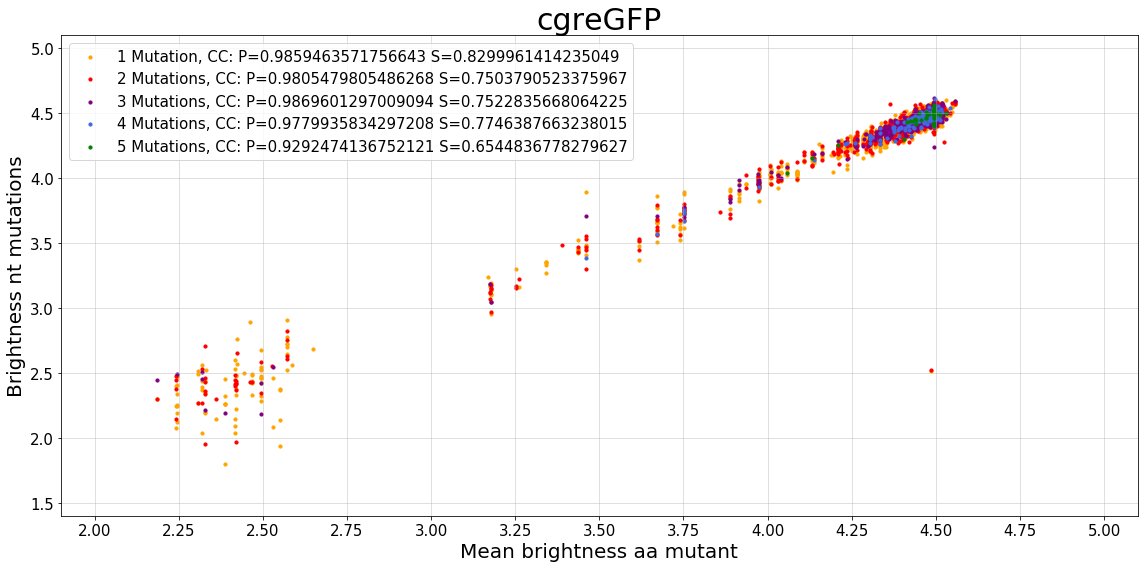

In [49]:
 
ax = result_aa_cgreGFP_bis.loc[result_aa_cgreGFP_bis['synmut'] == 1].plot(kind='scatter', x='mean', y='bright', color='orange', label='1 Mutation, CC: P={} S={}'.format(corrP_1_cgreGFP,corrS_1_cgreGFP), s=10, figsize=(16,8))
result_aa_cgreGFP_bis.loc[result_aa_cgreGFP_bis['synmut'] == 2].plot(kind='scatter', x='mean', y='bright', color='red', label='2 Mutations, CC: P={} S={}'.format(corrP_2_cgreGFP,corrS_2_cgreGFP), s=10, ax=ax)  
result_aa_cgreGFP_bis.loc[result_aa_cgreGFP_bis['synmut'] == 3].plot(kind='scatter', x='mean', y='bright', color='purple', label='3 Mutations, CC: P={} S={}'.format(corrP_3_cgreGFP,corrS_3_cgreGFP), s=10, ax=ax)  
result_aa_cgreGFP_bis.loc[result_aa_cgreGFP_bis['synmut'] == 4].plot(kind='scatter', x='mean', y='bright', color='royalblue', label='4 Mutations, CC: P={} S={}'.format(corrP_4_cgreGFP,corrS_4_cgreGFP), s=10, ax=ax)
result_aa_cgreGFP_bis.loc[result_aa_cgreGFP_bis['synmut'] == 5].plot(kind='scatter', x='mean', y='bright', color='green', label='5 Mutations, CC: P={} S={}'.format(corrP_5_cgreGFP,corrS_5_cgreGFP), s=10, ax=ax)  

ax.set_xlabel("Mean brightness aa mutant", fontsize=20)
ax.set_ylabel("Brightness nt mutations", fontsize=20)
ax.set_xticks(np.arange(1.5, 5.5, step=0.25));
ax.set_xlim(xmin=1.9,xmax=5.1)
ax.set_yticks(np.arange(1, 5.5, step=0.5));
ax.set_ylim(ymin=1.4,ymax=5.1)
ax.grid(alpha=0.5)
plt.title('cgreGFP', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(loc='upper left',fontsize=15)

plt.tight_layout()
plt.savefig('Syn_mut_cgre_mean.png', dpi=300)

## **<font color=green>ppluGFP</font>**

In [32]:
#From the previously created dataset, select the data for the ppluGFP gene

aa_mut_ppluGFP = aa_mut[aa_mut.gene=='ppluGFP']
aa_mut_ppluGFP.reset_index(inplace=True)

aa_mut_ppluGFP

,index,gene,aa_genotype_pseudo,nt_genotype,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,nt_mutnumber,aa_mutnumber,syn_mutnumber
0,79405,ppluGFP,*246C,A668T,80.12,5.0,2187.444683,4.219183,NaN,NaN,NaN,NaN,1,1,0
1,79406,ppluGFP,*246C,C443T:A668T,175.57,8.0,1021.190341,4.221520,NaN,NaN,NaN,NaN,2,1,1
2,79407,ppluGFP,*246D,A665T:T666G:G667A:A668T,248.77,12.0,2906.194501,4.269007,NaN,NaN,NaN,NaN,4,1,3
3,79408,ppluGFP,*246G,A131T:C278T:T666G,46.58,6.0,3168.085504,4.241350,NaN,NaN,NaN,NaN,3,1,2
4,79409,ppluGFP,*246G,C188T:T666G,84.80,4.0,995.413000,4.247161,NaN,NaN,NaN,NaN,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47156,126561,ppluGFP,wt,T659A,2550.52,100.0,2179.232814,4.229176,NaN,NaN,NaN,NaN,1,0,1
47157,126562,ppluGFP,wt,T659A:C662T,241.75,6.0,1087.798528,4.241842,NaN,NaN,NaN,NaN,2,0,2
47158,126563,ppluGFP,wt,T659C,3953.45,174.0,2149.481279,4.227871,NaN,NaN,NaN,NaN,1,0,1
47159,126564,ppluGFP,wt,T659G,1991.66,49.0,1502.910328,4.225663,NaN,NaN,NaN,NaN,1,0,1


In [33]:
#Calculate the number of different aa gennotypes that we have in ppluGFP and create a value with all of them

aa_mut_types_pplu = aa_mut_ppluGFP.aa_genotype_pseudo.unique()

In [34]:
amino_ppluGFP = {}
nt_ppluGFP = {}
brightness_ppluGFP = {}
synmut_ppluGFP = {}
                

for index, row in aa_mut_ppluGFP.iterrows(): 
        if ':' not in row["aa_genotype_pseudo"]:
            try:
                amino_ppluGFP[index] = (row["aa_genotype_pseudo"])
                nt_ppluGFP[index] = (row["nt_genotype"])
                brightness_ppluGFP[index] = (row["replicates_mean_brightness"])
                synmut_ppluGFP[index] = (row["syn_mutnumber"])
                
            except IndexError:
                pass
            except ValueError:
                pass

In [35]:
amino_ppluGFP = pd.DataFrame.from_dict(amino_ppluGFP, orient='index')
nt_ppluGFP = pd.DataFrame.from_dict(nt_ppluGFP, orient='index')
brightness_ppluGFP = pd.DataFrame.from_dict(brightness_ppluGFP, orient='index')
synmut_ppluGFP = pd.DataFrame.from_dict(synmut_ppluGFP, orient='index')

result_aa_ppluGFP = pd.concat([amino_ppluGFP, nt_ppluGFP, brightness_ppluGFP, synmut_ppluGFP], axis=1, sort=False)
result_aa_ppluGFP.columns =['aa','nt', 'bright', 'synmut']

result_aa_ppluGFP

,aa,nt,bright,synmut
0,*246C,A668T,4.219183,0
1,*246C,C443T:A668T,4.221520,1
2,*246D,A665T:T666G:G667A:A668T,4.269007,3
3,*246G,A131T:C278T:T666G,4.241350,2
4,*246G,C188T:T666G,4.247161,1
...,...,...,...,...
47156,wt,T659A,4.229176,1
47157,wt,T659A:C662T,4.241842,2
47158,wt,T659C,4.227871,1
47159,wt,T659G,4.225663,1


In [36]:
aa_mean_ppluGFP = {}
for amino in aa_mut_types_pplu:
    aa_mean_pplu = result_aa_ppluGFP[result_aa_ppluGFP.aa == amino]
    aa_mean_ppluGFP[amino] = aa_mean_pplu[aa_mean_pplu['synmut']==0]['bright'].mean()

In [37]:
aa_mean_ppluGFP_new = pd.DataFrame.from_dict(aa_mean_ppluGFP, orient='index')
aa_mean_ppluGFP_new.columns =['mean']
aa_mean_ppluGFP_new = aa_mean_ppluGFP_new.rename_axis('aa').reset_index()
aa_mean_ppluGFP_new

,aa,mean
0,*246C,4.219183
1,*246D,NaN
2,*246G,4.238693
3,*246L,4.251611
4,*246M,NaN
...,...,...
32262,Y95S:N222Y,NaN
32263,Y95S:R99C:F113S,NaN
32264,Y95S:S192G,NaN
32265,Y95S:Y103C,NaN


In [38]:
result_aa_ppluGFP_bis = pd.merge(result_aa_ppluGFP, aa_mean_ppluGFP_new, how='outer', on='aa')
result_aa_ppluGFP_bis = result_aa_ppluGFP_bis.dropna()

result_aa_ppluGFP_bis

,aa,nt,bright,synmut,mean
0,*246C,A668T,4.219183,0.0,4.219183
1,*246C,C443T:A668T,4.221520,1.0,4.219183
3,*246G,A131T:C278T:T666G,4.241350,2.0,4.238693
4,*246G,C188T:T666G,4.247161,1.0,4.238693
5,*246G,G404T:T473C:A635G:T666G,4.242405,3.0,4.238693
...,...,...,...,...,...
15389,wt,T659A,4.229176,1.0,4.226943
15390,wt,T659A:C662T,4.241842,2.0,4.226943
15391,wt,T659C,4.227871,1.0,4.226943
15392,wt,T659G,4.225663,1.0,4.226943


In [39]:
mean_0_ppluGFP = result_aa_ppluGFP_bis["mean"]
mean_1_ppluGFP = result_aa_ppluGFP_bis[result_aa_ppluGFP_bis['synmut']==1]['bright']
mean_2_ppluGFP = result_aa_ppluGFP_bis[result_aa_ppluGFP_bis['synmut']==2]['bright']
mean_3_ppluGFP = result_aa_ppluGFP_bis[result_aa_ppluGFP_bis['synmut']==3]['bright']
mean_4_ppluGFP = result_aa_ppluGFP_bis[result_aa_ppluGFP_bis['synmut']==4]['bright']
mean_5_ppluGFP = result_aa_ppluGFP_bis[result_aa_ppluGFP_bis['synmut']==5]['bright']

corrP_1_ppluGFP =mean_0_ppluGFP.corr(mean_1_ppluGFP, method='pearson')
corrP_2_ppluGFP =mean_0_ppluGFP.corr(mean_2_ppluGFP, method='pearson')
corrP_3_ppluGFP =mean_0_ppluGFP.corr(mean_3_ppluGFP, method='pearson')
corrP_4_ppluGFP =mean_0_ppluGFP.corr(mean_4_ppluGFP, method='pearson')
corrP_5_ppluGFP =mean_0_ppluGFP.corr(mean_5_ppluGFP, method='pearson')

corrS_1_ppluGFP =mean_0_ppluGFP.corr(mean_1_ppluGFP, method='spearman')
corrS_2_ppluGFP =mean_0_ppluGFP.corr(mean_2_ppluGFP, method='spearman')
corrS_3_ppluGFP =mean_0_ppluGFP.corr(mean_3_ppluGFP, method='spearman')
corrS_4_ppluGFP =mean_0_ppluGFP.corr(mean_4_ppluGFP, method='spearman')
corrS_5_ppluGFP =mean_0_ppluGFP.corr(mean_5_ppluGFP, method='spearman')

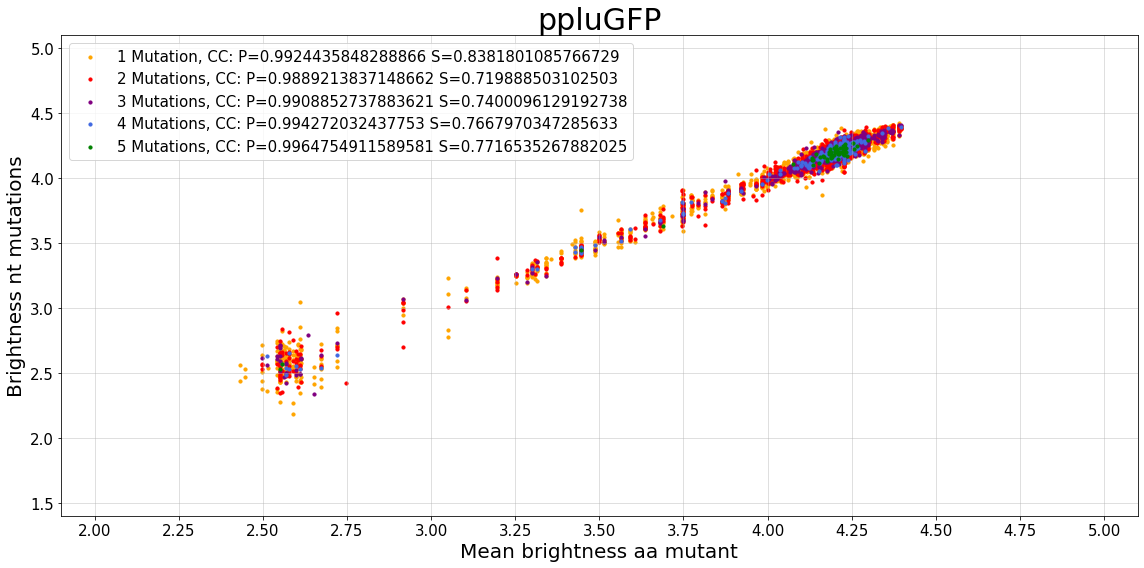

In [50]:
ax = result_aa_ppluGFP_bis.loc[result_aa_ppluGFP_bis['synmut'] == 1].plot(kind='scatter', x='mean', y='bright', color='orange', label='1 Mutation, CC: P={} S={}'.format(corrP_1_ppluGFP,corrS_1_ppluGFP), s=10, figsize=(16,8))
result_aa_ppluGFP_bis.loc[result_aa_ppluGFP_bis['synmut'] == 2].plot(kind='scatter', x='mean', y='bright', color='red', label='2 Mutations, CC: P={} S={}'.format(corrP_2_ppluGFP,corrS_2_ppluGFP), s=10, ax=ax)  
result_aa_ppluGFP_bis.loc[result_aa_ppluGFP_bis['synmut'] == 3].plot(kind='scatter', x='mean', y='bright', color='purple', label='3 Mutations, CC: P={} S={}'.format(corrP_3_ppluGFP,corrS_3_ppluGFP), s=10, ax=ax)  
result_aa_ppluGFP_bis.loc[result_aa_ppluGFP_bis['synmut'] == 4].plot(kind='scatter', x='mean', y='bright', color='royalblue', label='4 Mutations, CC: P={} S={}'.format(corrP_4_ppluGFP,corrS_4_ppluGFP), s=10, ax=ax)
result_aa_ppluGFP_bis.loc[result_aa_ppluGFP_bis['synmut'] == 5].plot(kind='scatter', x='mean', y='bright', color='green', label='5 Mutations, CC: P={} S={}'.format(corrP_5_ppluGFP,corrS_5_ppluGFP), s=10, ax=ax)  


ax.set_xlabel("Mean brightness aa mutant", fontsize=20)
ax.set_ylabel("Brightness nt mutations", fontsize=20)
ax.set_xticks(np.arange(1.5, 5.5, step=0.25));
ax.set_xlim(xmin=1.9,xmax=5.1)
ax.set_yticks(np.arange(1, 5.5, step=0.5));
ax.set_ylim(ymin=1.4,ymax=5.1)
ax.grid(alpha=0.5)
plt.title('ppluGFP', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(loc='upper left',fontsize=15)

plt.tight_layout()
plt.savefig('Syn_mut_pplu_mean.png', dpi=300)